In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('aa.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


(-0.5, 1099.5, 822.5, -0.5)

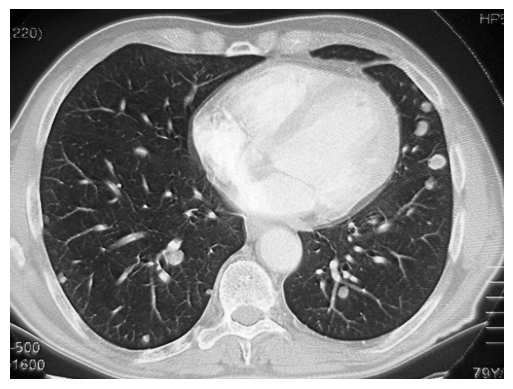

In [4]:
plt.imshow(img_gray,cmap='gray')
plt.axis('off')

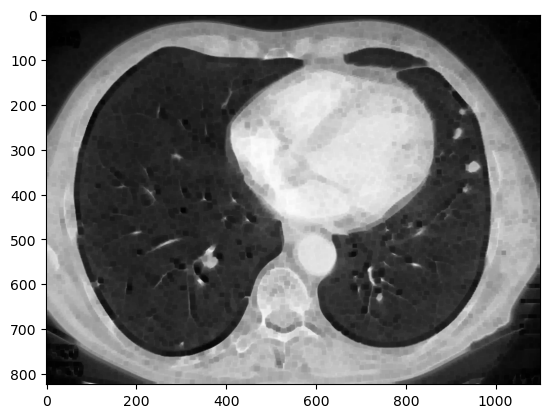

In [9]:
# Erose and dilation.
my_kernel = np.ones((5,5),dtype= np.uint8)
erose_img = cv2.erode(img_gray,my_kernel,iterations=2)
plt.imshow(erose_img,cmap='gray')

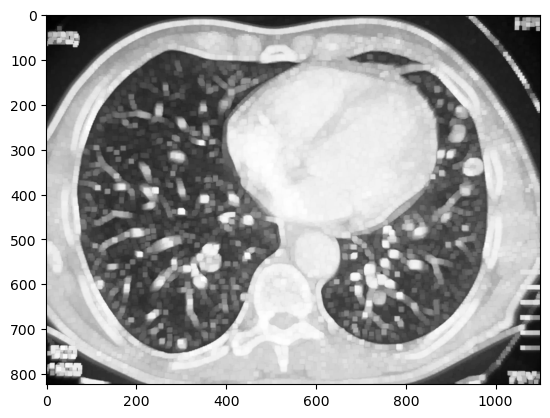

In [11]:
dilation_img= cv2.dilate(img_gray,my_kernel,iterations = 2)
plt.imshow(dilation_img,cmap='gray')

In [22]:
## Thresholds
_,binary_img = cv2.threshold(img_gray,thresh=125,maxval=255,type= cv2.THRESH_BINARY)
_,binary_inv_img = cv2.threshold(img_gray,thresh=125,maxval=255,type= cv2.THRESH_BINARY_INV)
_,tozero_img = cv2.threshold(img_gray,thresh=125,maxval=255,type= cv2.THRESH_TOZERO)
_,tozero_inv_img = cv2.threshold(img_gray,thresh=125,maxval=255,type= cv2.THRESH_TOZERO_INV)
_,trunc_img = cv2.threshold(img_gray,thresh=125,maxval=255,type= cv2.THRESH_TRUNC)




(-0.5, 1099.5, 822.5, -0.5)

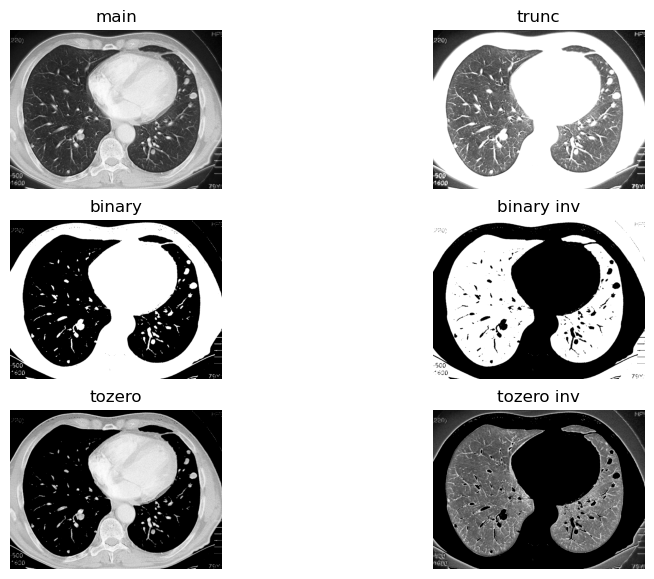

In [26]:
#Ekrana Yazdirma
fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 2

fig.add_subplot(rows,columns,1)
plt.title("main")
plt.imshow(img_gray,cmap='gray')
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("binary")
plt.imshow(binary_img,cmap ='gray')
plt.axis("off")

fig.add_subplot(rows,columns,4)
plt.title("binary inv")
plt.imshow(binary_inv_img,cmap ='gray')
plt.axis("off")

fig.add_subplot(rows,columns,5)
plt.title("tozero")
plt.imshow(tozero_img,cmap ='gray')

plt.axis("off")
fig.add_subplot(rows,columns,6)
plt.title("tozero inv")
plt.imshow(tozero_inv_img,cmap ='gray')

plt.axis("off")
fig.add_subplot(rows,columns,2)
plt.title("trunc")
plt.imshow(trunc_img,cmap ='gray')
plt.axis("off")

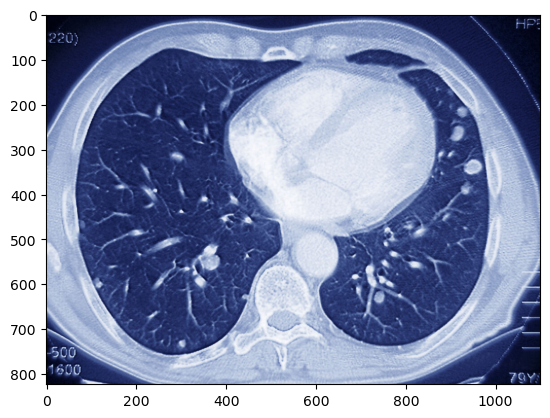

In [28]:
# rgb hale getirme 
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [29]:
img_painted = img

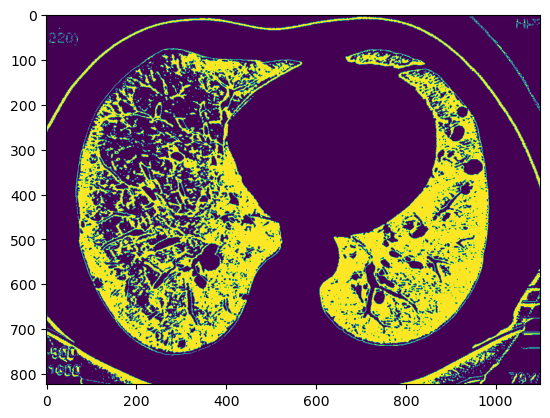

In [30]:
img_indexes = (img_rgb[:,:,0]<100) &(img_rgb[:,:,1]<100) & (img_rgb[:,:,2]>100)
plt.imshow(img_indexes)

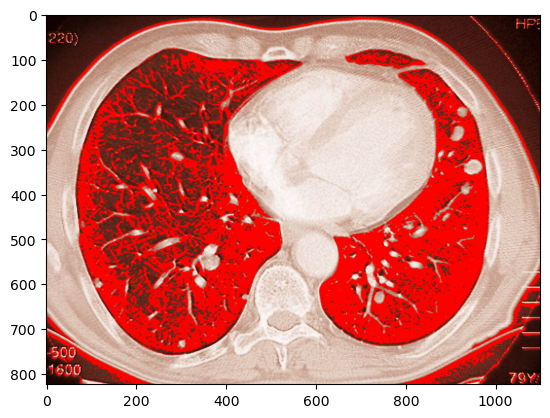

In [32]:
img_painted[img_indexes] = [255,0,0]
plt.imshow(img_painted)

(-0.5, 1099.5, 822.5, -0.5)

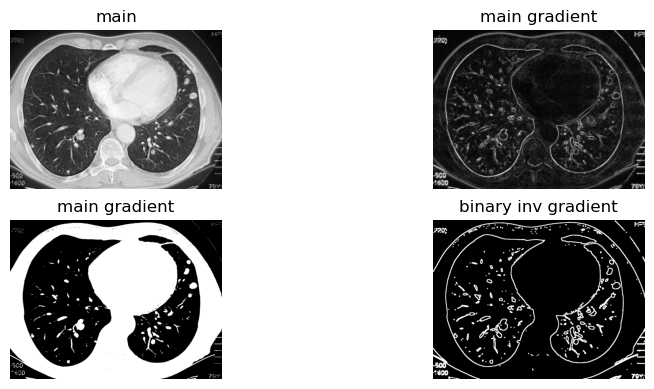

In [36]:
my_gradient_img_1 = cv2.morphologyEx(img_gray,cv2.MORPH_GRADIENT,my_kernel)
my_gradient_img_2 = cv2.morphologyEx(binary_inv_img,cv2.MORPH_GRADIENT,my_kernel)

#Ekrana Yazdirma
fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 2

fig.add_subplot(rows,columns,1)
plt.title("main")
plt.imshow(img_gray,cmap='gray')
plt.axis("off")

fig.add_subplot(rows,columns,2)
plt.title("main gradient")
plt.imshow(my_gradient_img_1,cmap ='gray')
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("main gradient")
plt.imshow(binary_img,cmap ='gray')
plt.axis("off")

fig.add_subplot(rows,columns,4)
plt.title("binary inv gradient")
plt.imshow(my_gradient_img_2,cmap ='gray')
plt.axis("off")

In [53]:
height,width = img.shape[:2]

def re_size(height,width):
    if height > 600 and width> 600:
        print('yukseklik ve genislik 600 den buyuk oldugu icin kucultuyorum')
        resized_image= cv2.resize(img_gray,(width//2,height//2),interpolation = cv2.INTER_LANCZOS4)
        return resized_image,None
    elif height < 600 and width< 600:
        print('yukseklik ve genislik 600 den kucuk oldugu icin kucultuyorum')
        resized_image= cv2.resize(img_gray,(width//2,height//2),interpolation = cv2.INTER_LANCZOS4)
        resized_image2= cv2.resize(img_gray,(width*2,height*2),interpolation = cv2.INTER_LANCZOS4)
        return resized_image, resized_image2
    else:
        resized_image= cv2.resize(img_gray,(width//2,height//2),interpolation = cv2.INTER_LANCZOS4)
        return resized_image,None
        

yukseklik ve genislik 600 den buyuk oldugu icin kucultuyorum
(411, 550)


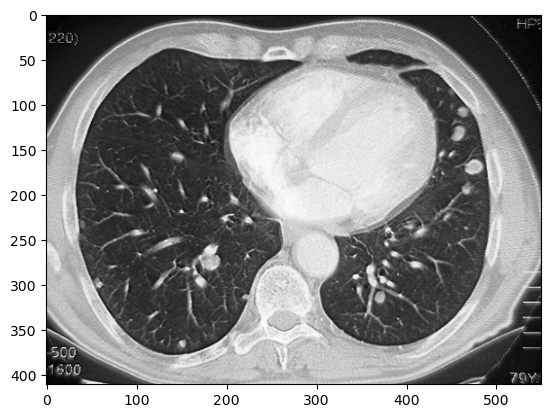

In [55]:
height,width = img.shape[:2]
img1,img2 = re_size(height,width)

if img1 is not None:
    plt.imshow(img1,cmap='gray')
    print(img1.shape)
if img2 is not None:
    plt.imshow(img2,cmap='gray')
    print(img2.shape)